# `Seaborn` Chart Styles 🦚
* In the style of FT graphics by John Burn-Murdoch / [@jburnmurdoch](https://twitter.com/jburnmurdoch) 

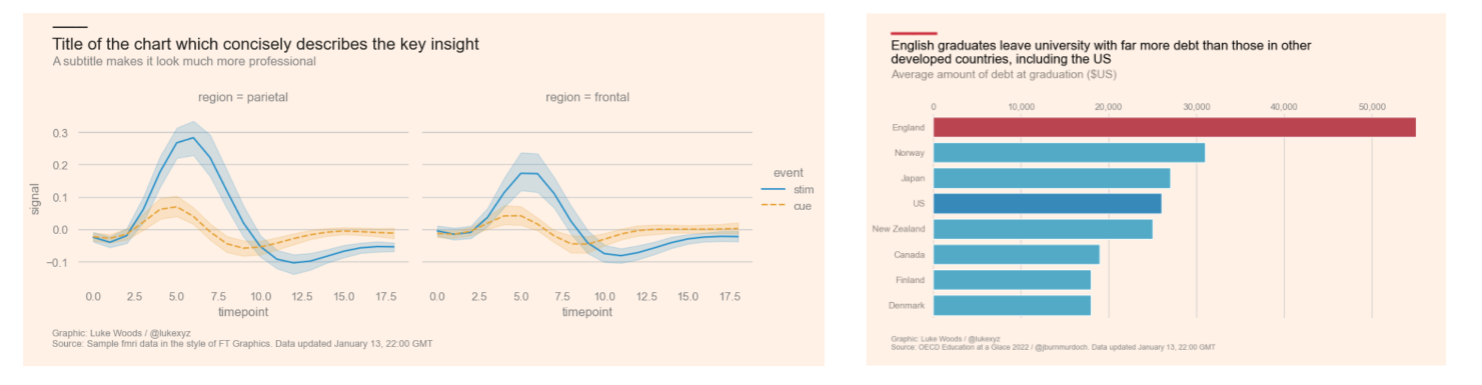

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from IPython.display import Markdown, display
from datetime import datetime

### 🎨 Custom `seaborn` palette

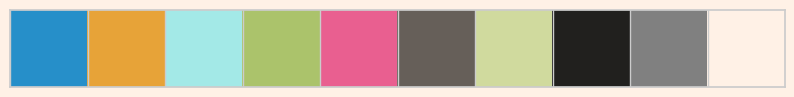

In [297]:
# Custom palette courtesy of FT graphics
custom_palette = ['#268fc9',  # blue
                  '#e7a338',  # yellow
                  '#a3e9e7',  # light blue
                  '#abc36b',  # green
                  '#e95f90',  # pink
                  '#665f59',  # brown
                  '#d0da9e',  # light green
                  '#21201e',  # off black
                  '#808080',  # label darker grey
                  '#fff1e6']  # background colour

#  ⟶ ───► ─── ━━━

sns.set_palette(custom_palette)
display(Markdown("### 🎨 Custom `seaborn` palette"))
sns.palplot(sns.color_palette())

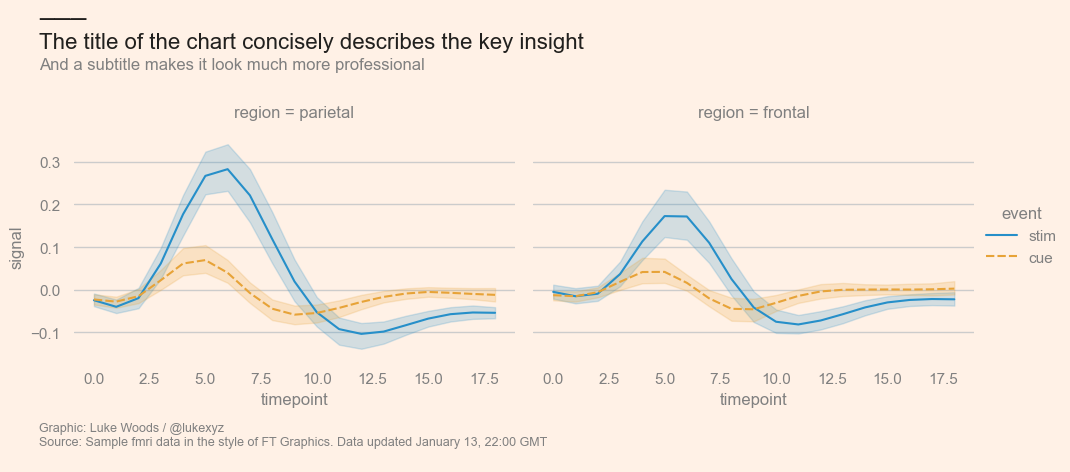

In [324]:
fmri = sns.load_dataset("fmri")

sns.set() # reset
sns.set_palette(custom_palette)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12  # Larger font size
plt.rcParams['font.family'] = 'sans-serif'  # Use 'sans-serif' family
plt.rcParams['font.sans-serif'] = ['Arial', 'Open Sans']  # Use 'Arial' as the first choice
plt.rcParams['text.color'] = '#808080'  # Gray color for all text
plt.rcParams['axes.labelcolor'] = '#808080'  # Gray color for x/y labels
plt.rcParams['axes.titlesize'] = 40  # Larger font size for the plot title
plt.rcParams['axes.titleweight'] = 300  # Bold font weight for plot title
plt.rcParams['axes.titlepad'] = 12  # Spacing between plot title and plot
plt.rcParams['xtick.color'] = '#808080'
plt.rcParams['ytick.color'] = '#808080'
plt.rcParams['figure.facecolor'] = '#fff1e6'
plt.rcParams['axes.facecolor'] = '#fff1e6'

g = sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

for ax in g.axes.flat:
    ax.grid(False, axis='x')  # This removes the vertical gridlines
sns.despine(left=True, bottom=True)

# Add titles 
g.fig.suptitle('──', fontsize=40, color='#ce3140', x=0.05, ha='left', y=1.05)
g.fig.suptitle(x=0.05, y=0.95, t='───\nThe title of the chart concisely describes the key insight', fontsize=16, color='#21201e', ha='left')
g.fig.text(x=0.05, y=0.83, s='And a subtitle makes it look much more professional', fontsize=12, color='#808080', ha='left')

# Metadata text with current date and time
current_datetime = datetime.now().strftime("%B %d, %H:00 GMT")
metadata_text = f"Graphic: Luke Woods / @lukexyz \nSource: Sample fmri data in the style of FT Graphics. Data updated {current_datetime} \n"
g.fig.text(x=0.05, y=0.05, s=metadata_text, fontsize=9, color='grey', ha='left')

plt.subplots_adjust(top=0.7, bottom=0.25) 
plt.show()

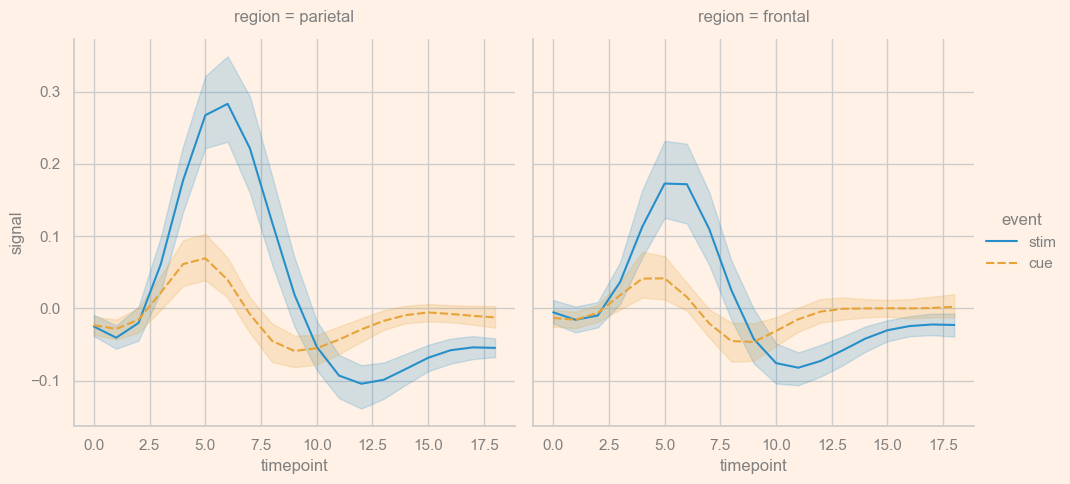

In [316]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
);

## Seaborn Bar Chart 🦚

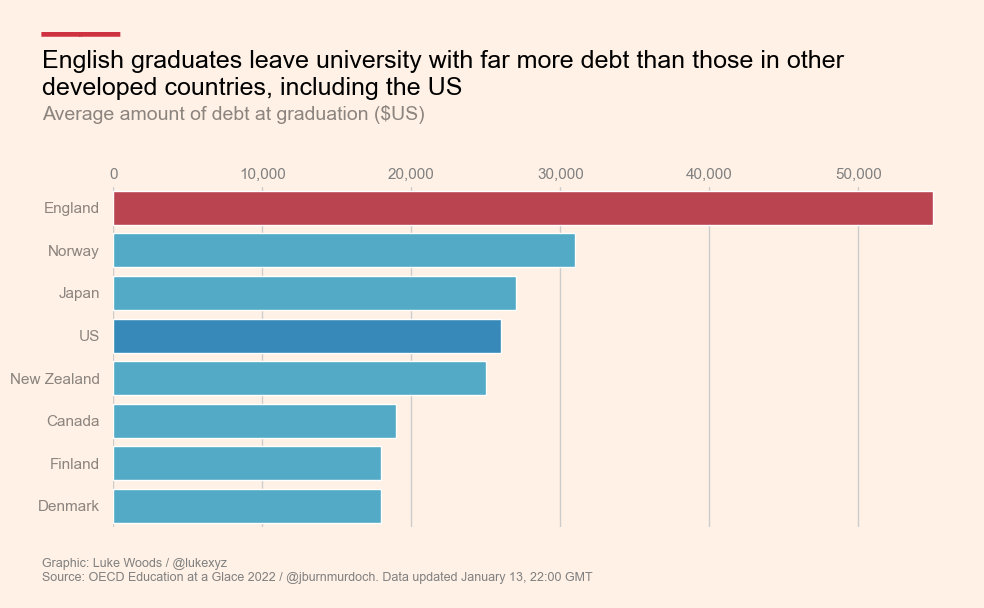

In [321]:
data = {
    'Country': ['Finland', 'Denmark', 'Canada', 'New Zealand', 'US', 'Japan', 'Norway', 'England'],
    'Average Debt': [18000, 18000, 19000, 25000, 26000, 27000, 31000, 55000]
}
df = pd.DataFrame(data).sort_values(by='Average Debt', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    x='Average Debt', 
    y='Country', 
    data=df, 
    palette=['#ce3140' if country == 'England' else '#208fce' if country == 'US' else '#3eb4db' for country in df['Country']]
)
sns.despine(left=True, bottom=True, right=True)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
barplot.xaxis.set_major_formatter(formatter)
barplot.xaxis.tick_top()
barplot.tick_params(axis='x', length=0)

# Add titles and subtitle
title = 'English graduates leave university with far more debt than those in other\ndeveloped countries, including the US'
plt.text(x=0.05, y=0.9, s=title, transform=plt.gcf().transFigure, ha='left', fontsize=18, color='black')
plt.suptitle('──', fontsize=40, color='#ce3140', x=0.05, ha='left', y=1.07)
subtitle_text = f"Average amount of debt at graduation ($US)"
plt.figtext(x=0.05, y=0.85, s=subtitle_text, ha='left', fontsize=14, color='#8c847e')

plt.xlabel('')
plt.ylabel('')
plt.rcParams['ytick.color'] = '#8c847e'

# Metadata text with current date and time
current_datetime = datetime.now().strftime("%B %d, %H:00 GMT")
metadata_text = f"Graphic: Luke Woods / @lukexyz \nSource: OECD Education at a Glace 2022 / @jburnmurdoch. Data updated {current_datetime} \n"
plt.figtext(0.05, -0.1, metadata_text, ha='left', fontsize=9, color='grey')

plt.tight_layout()
plt.show()

Reference: [@jburnmurdoch](https://twitter.com/jburnmurdoch/status/1718251375971197408/photo/1)

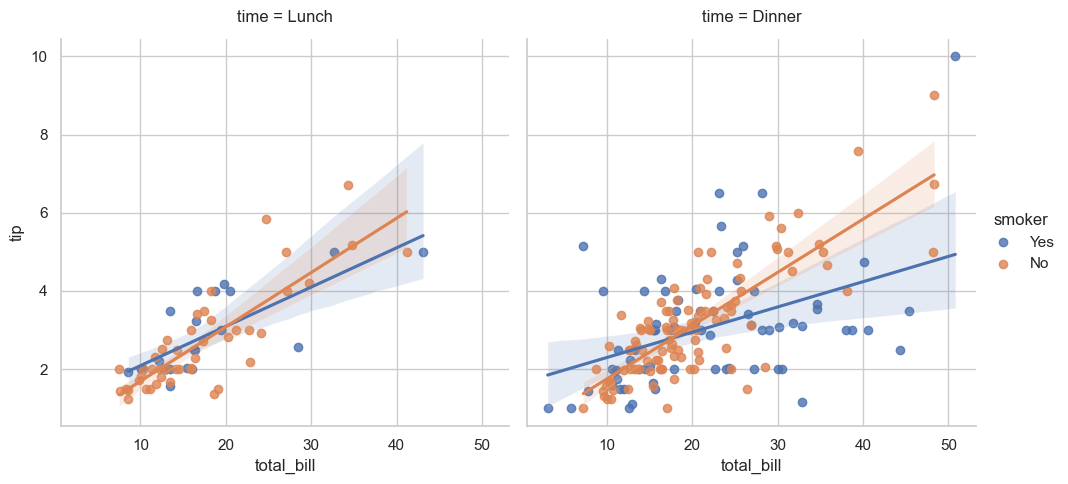

In [208]:
sns.set() # reset
sns.set_style("whitegrid")
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

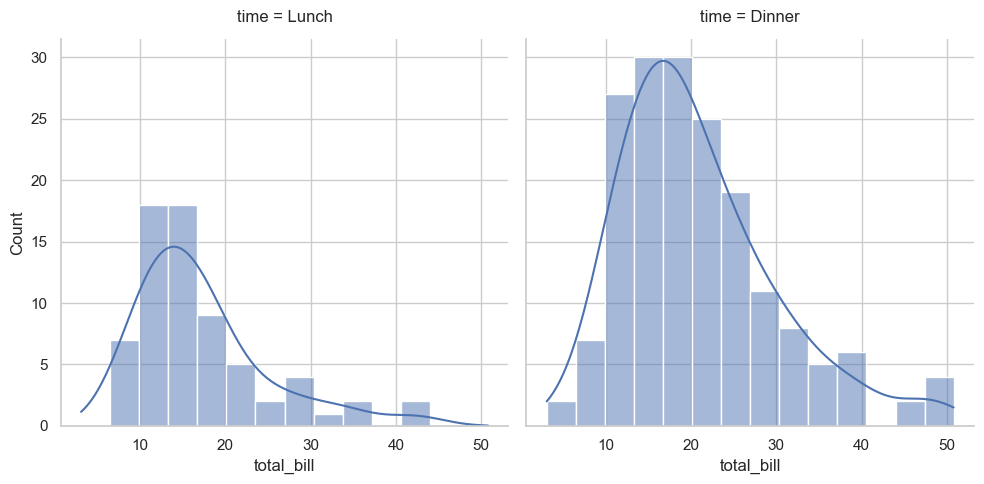

In [210]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

# Chart Style with `Altair` 🦚

In [4]:
import altair as alt
import pandas as pd

# Data
data = {
    'Country': ['Finland', 'Denmark', 'Canada', 'New Zealand', 'US', 'Japan', 'Norway', 'England'],
    'Average Debt': [18000, 18000, 19000, 25000, 26000, 27000, 31000, 55000]
}
df = pd.DataFrame(data).sort_values(by='Average Debt', ascending=False)

# Selection for hover
hover = alt.selection_single(
    fields=['Country', 'Average Debt'],
    nearest=True,
    on='mouseover',
    empty='none'
)

# Color encoding for bars
color_scale = alt.Scale(
    domain=['US', 'England'],
    range=['#208fce', '#ce3140']
)

# Bar chart
bar_chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Average Debt:Q', axis=alt.Axis(title='', format='$,.0f', orient='top')),
    y=alt.Y('Country:N', axis=alt.Axis(title=''), sort='-x'),
    color=alt.condition(
        alt.FieldOneOfPredicate(field='Country', oneOf=['England', 'US']),
        alt.Color('Country:N', scale=color_scale, legend=None),  # Set legend to None
        alt.value('#3eb4db')  # Default color for other countries
    ),
    opacity=alt.condition(hover, alt.value(1), alt.value(0.5))
).add_params(hover)

# Text for hover
hover_val = bar_chart.transform_filter(hover).encode(
    x=alt.value(550),  # Position of the text
    y=alt.value(220),  # Position of the text
    text=alt.Text('Average Debt:Q', format='$,.0f'),
    size=alt.value(30)
).mark_text(align='left')

# Text for hover
hover_text = bar_chart.transform_filter(hover).encode(
    x=alt.value(550),  # Position of the text
    y=alt.value(250),  # Position of the text
    text=alt.Text('Country:N'),
    size=alt.value(30)
).mark_text(align='left')

# Title and subtitle
title = [
    'English graduates leave university with far more debt than those in other',
    'developed countries, including the US'
]
subtitle_text = "Average amount of debt at graduation ($US)"

# Combine bar chart and hover text
chart = alt.layer(bar_chart, hover_val, hover_text).properties(
    width=700,
    height=300,
    title={
        "text": title,
        "subtitle": [subtitle_text],
        "fontSize": 16,
        "color": "black",
        "subtitleColor": "grey",
        "anchor": "start",
        "offset": 20  # Increase offset for more padding above the title
    }
)

chart = chart.configure(
    background='#fff1e6'
).properties(
    width=700,
    height=300,
    padding=30,  # Padding around the entire chart
).configure_view(
    strokeWidth=0,  # No border around the view
    fill='#fff1e6'  # Background color of the view
)

chart

d:\ProgramData\Anaconda3.9\lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
d:\ProgramData\Anaconda3.9\lib\site-packages\altair\vegalite\v5\api.py:398: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(


alt.LayerChart(...)